In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
x_data=np.linspace(0, 5, 1000000)

In [153]:
noise = np.random.random(len(x_data))


**b=5, w=1.3**

In [154]:
y_true=(0.3* x_data) + 5 +noise

In [155]:
x_df=pd.DataFrame(data=x_data, columns=['X Data'])

In [156]:
y_df=pd.DataFrame(data=y_true, columns=['Y'])

In [157]:
my_data=pd.concat([x_df, y_df], axis=1)

In [158]:
my_data.head()

,X Data,Y
0,0.000000,5.122073
1,0.000005,5.260089
2,0.000010,5.760297
3,0.000015,5.877167
4,0.000020,5.920521


In [288]:
my_data.sample(n=250, replace=True).plot(kind='scatter', x='X Data', y='Y')

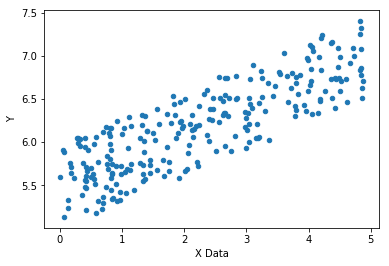

In [289]:
plt.show()

In [453]:
my_data.sample(n=1000).plot()

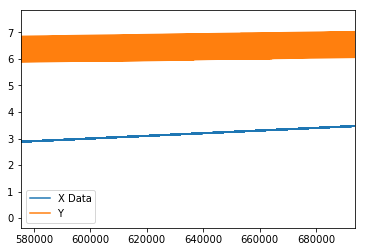

In [454]:
plt.show()

# Tensorflow

In [165]:
import tensorflow as tf

In [166]:
batch_size=10

**variables**

In [271]:
w=tf.Variable(3.7)
b=tf.Variable(2.2)

In [461]:
xph=tf.placeholder(tf.float32,[batch_size])

In [462]:
yph=tf.placeholder(tf.float32,[batch_size])

**Graph**

In [463]:
y_model = w*xph+b

In [464]:
error=tf.reduce_sum(tf.square(yph-y_model))

**optimiser**

In [465]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [466]:
init=tf.global_variables_initializer()

In [1]:
with tf.Session() as sess:
    sess.run(init)
    batch=1000
    for i in range(batch):
        index=np.random.randint(len(x_data),size=batch_size )
        feed= {xph:x_data[index], yph:y_true[index]}
        sess.run(train, feed_dict=feed)
        #print("____________passed_______________")
        #k=sess.run(w)
        print(i)
    model_w, model_b=sess.run([w, b])

NameError: name 'tf' is not defined

In [468]:
model_w, model_b

(0.31185183, 5.4522939)

In [469]:
y_pred= model_w*x_data+model_b

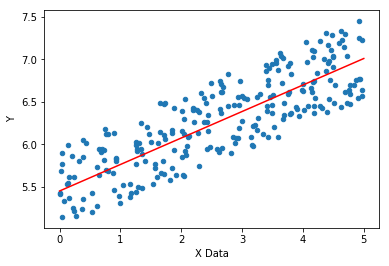

In [470]:
#my_data.plot(kind='scatter', x='X Data', y='Y')
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_pred, 'r')
plt.show()

In [356]:
feat_cols=[tf.feature_column.numeric_column('x', shape=[1])]

In [357]:
estimator=tf.estimator.LinearRegressor(feature_columns= feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Brothers\\AppData\\Local\\Temp\\tmpsz8fab01', '_save_checkpoints_secs': 600}


In [358]:
from sklearn.model_selection import train_test_split

In [359]:
trainx, testx, trainy, testy=train_test_split(x_data, y_true, test_size=0.3)

#### setting up estimator

In [360]:
train_fn=tf.estimator.inputs.numpy_input_fn({'x':trainx}, trainy, batch_size=4, num_epochs=None, shuffle=True)

In [361]:
eval_fn=tf.estimator.inputs.numpy_input_fn({'x':testx}, testy,batch_size=4, num_epochs=1000, shuffle=False )

### training

In [365]:
z=estimator.train(input_fn=train_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmpsz8fab01\model.ckpt-3000
INFO:tensorflow:Saving checkpoints for 3001 into C:\Users\Brothers\AppData\Local\Temp\tmpsz8fab01\model.ckpt.
INFO:tensorflow:loss = 0.427649, step = 3001
INFO:tensorflow:global_step/sec: 617.321
INFO:tensorflow:loss = 0.190775, step = 3101 (0.164 sec)
INFO:tensorflow:global_step/sec: 671.175
INFO:tensorflow:loss = 0.41194, step = 3201 (0.149 sec)
INFO:tensorflow:global_step/sec: 662.286
INFO:tensorflow:loss = 0.435503, step = 3301 (0.151 sec)
INFO:tensorflow:global_step/sec: 699.342
INFO:tensorflow:loss = 0.331948, step = 3401 (0.143 sec)
INFO:tensorflow:global_step/sec: 649.385
INFO:tensorflow:loss = 0.301048, step = 3501 (0.154 sec)
INFO:tensorflow:global_step/sec: 666.705
INFO:tensorflow:loss = 0.469765, step = 3601 (0.150 sec)
INFO:tensorflow:global_step/sec: 729.968
INFO:tensorflow:loss = 0.259268, step = 3701 (0.137 sec)
INFO:tens

**evaluation**

In [372]:
evaluated=estimator.evaluate(input_fn=eval_fn, steps=1000)

INFO:tensorflow:Starting evaluation at 2019-04-13-20:25:35
INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmpsz8fab01\model.ckpt-4000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

In [471]:
evaluated

{'average_loss': 0.083019838, 'global_step': 4000, 'loss': 0.33207935}

**prediction**

In [441]:
new_data=np.linspace(0,5,50)

In [442]:
input_fn=tf.estimator.inputs.numpy_input_fn({'x': new_data}, shuffle=False)

In [443]:
list(estimator.predict(input_fn=input_fn))

INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmpsz8fab01\model.ckpt-4000


[{'predictions': array([ 5.49413824], dtype=float32)},
 {'predictions': array([ 5.52496719], dtype=float32)},
 {'predictions': array([ 5.55579615], dtype=float32)},
 {'predictions': array([ 5.5866251], dtype=float32)},
 {'predictions': array([ 5.61745405], dtype=float32)},
 {'predictions': array([ 5.648283], dtype=float32)},
 {'predictions': array([ 5.67911196], dtype=float32)},
 {'predictions': array([ 5.70994091], dtype=float32)},
 {'predictions': array([ 5.74076986], dtype=float32)},
 {'predictions': array([ 5.77159882], dtype=float32)},
 {'predictions': array([ 5.80242777], dtype=float32)},
 {'predictions': array([ 5.83325672], dtype=float32)},
 {'predictions': array([ 5.86408567], dtype=float32)},
 {'predictions': array([ 5.89491463], dtype=float32)},
 {'predictions': array([ 5.92574358], dtype=float32)},
 {'predictions': array([ 5.95657253], dtype=float32)},
 {'predictions': array([ 5.98740149], dtype=float32)},
 {'predictions': array([ 6.01823044], dtype=float32)},
 {'prediction

In [444]:
predicted=[]
for predictedvals in estimator.predict(input_fn=input_fn):
    predicted.append(predictedvals['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Brothers\AppData\Local\Temp\tmpsz8fab01\model.ckpt-4000


In [445]:
predicted


[array([ 5.49413824], dtype=float32),
 array([ 5.52496719], dtype=float32),
 array([ 5.55579615], dtype=float32),
 array([ 5.5866251], dtype=float32),
 array([ 5.61745405], dtype=float32),
 array([ 5.648283], dtype=float32),
 array([ 5.67911196], dtype=float32),
 array([ 5.70994091], dtype=float32),
 array([ 5.74076986], dtype=float32),
 array([ 5.77159882], dtype=float32),
 array([ 5.80242777], dtype=float32),
 array([ 5.83325672], dtype=float32),
 array([ 5.86408567], dtype=float32),
 array([ 5.89491463], dtype=float32),
 array([ 5.92574358], dtype=float32),
 array([ 5.95657253], dtype=float32),
 array([ 5.98740149], dtype=float32),
 array([ 6.01823044], dtype=float32),
 array([ 6.04905939], dtype=float32),
 array([ 6.07988834], dtype=float32),
 array([ 6.1107173], dtype=float32),
 array([ 6.14154625], dtype=float32),
 array([ 6.1723752], dtype=float32),
 array([ 6.20320415], dtype=float32),
 array([ 6.23403311], dtype=float32),
 array([ 6.26486206], dtype=float32),
 array([ 6.295691

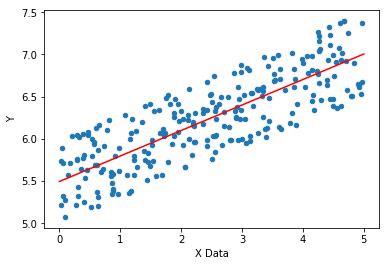

In [472]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(new_data, predicted, 'r')
#plt.plot(new_data, 'g')
#plt.plot(predicted, 'b')
plt.show()